<a href="https://colab.research.google.com/github/Mubarok982/DM_ML/blob/main/Copy_of_Tugas_DM_PERT_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load Dataset

In [ ]:
data = pd.read_csv("telco.csv", delimiter=";")
data.head()

,customerid,region,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,2424-WVHPL,France,Male,1,No,No,1,Yes,No,Fiber optic,...,No,No,Yes,No,No,No,Electronic check,12.00,12,No
1,3679-XASPY,France,Female,0,Yes,Yes,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,No,Electronic check,13.00,13,No
2,2967-MXRAV,Germany,Male,0,Yes,Yes,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,No,Mailed check,18.80,18.8,No
3,8992-CEUEN,Germany,Female,0,No,No,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,No,Electronic check,18.85,18.85,No
4,9318-NKNFC,Germany,Male,0,No,No,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Yes,Mailed check,18.85,18.85,Yes


In [ ]:
# Menampilkan ringkasan informasi dari dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   region            7043 non-null   object 
 2   gender            7043 non-null   object 
 3   seniorcitizen     7043 non-null   int64  
 4   partner           7043 non-null   object 
 5   dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   phoneservice      7043 non-null   object 
 8   multiplelines     7043 non-null   object 
 9   internetservice   7043 non-null   object 
 10  onlinesecurity    7043 non-null   object 
 11  onlinebackup      7043 non-null   object 
 12  deviceprotection  7043 non-null   object 
 13  techsupport       7043 non-null   object 
 14  streamingtv       7043 non-null   object 
 15  streamingmovies   7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


# Menampilkan Distribusi fitur numerik

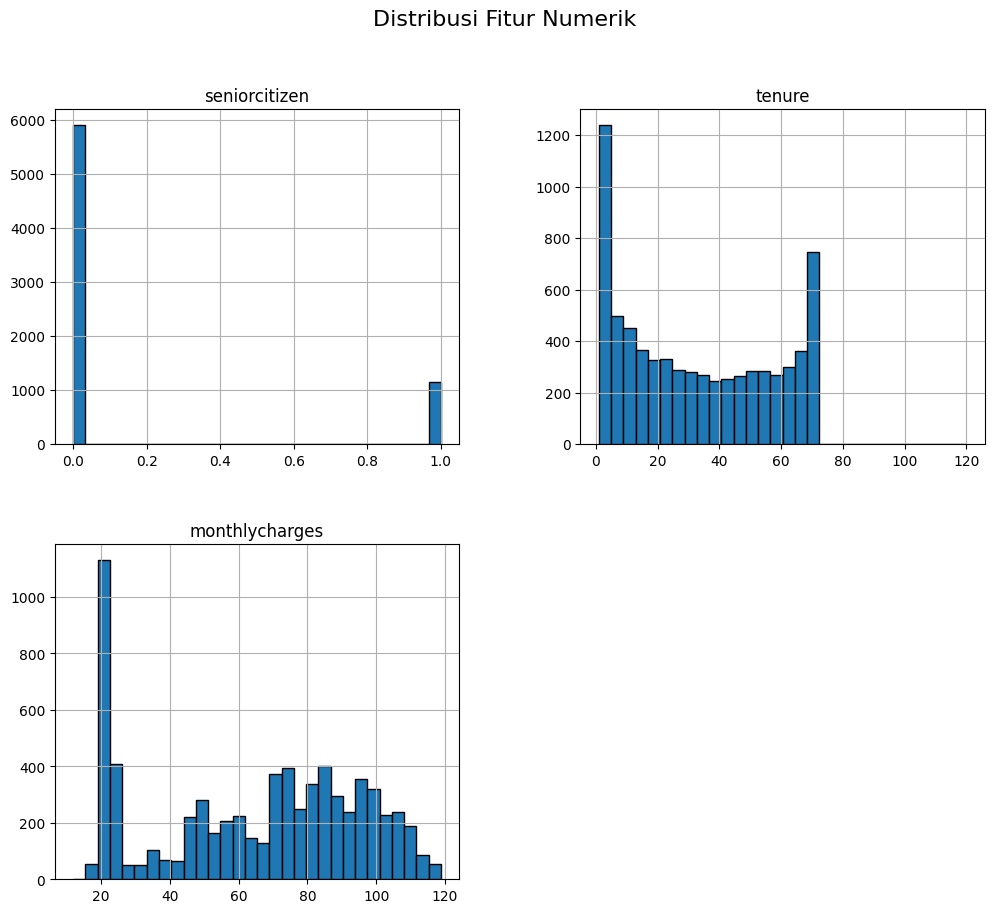

In [ ]:
# Menampilkan distribusi fitur numerik
data.select_dtypes(include=['number']).hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Distribusi Fitur Numerik", fontsize=16)
plt.show()


# # Menampilkan Distribusi fitur kategorikal

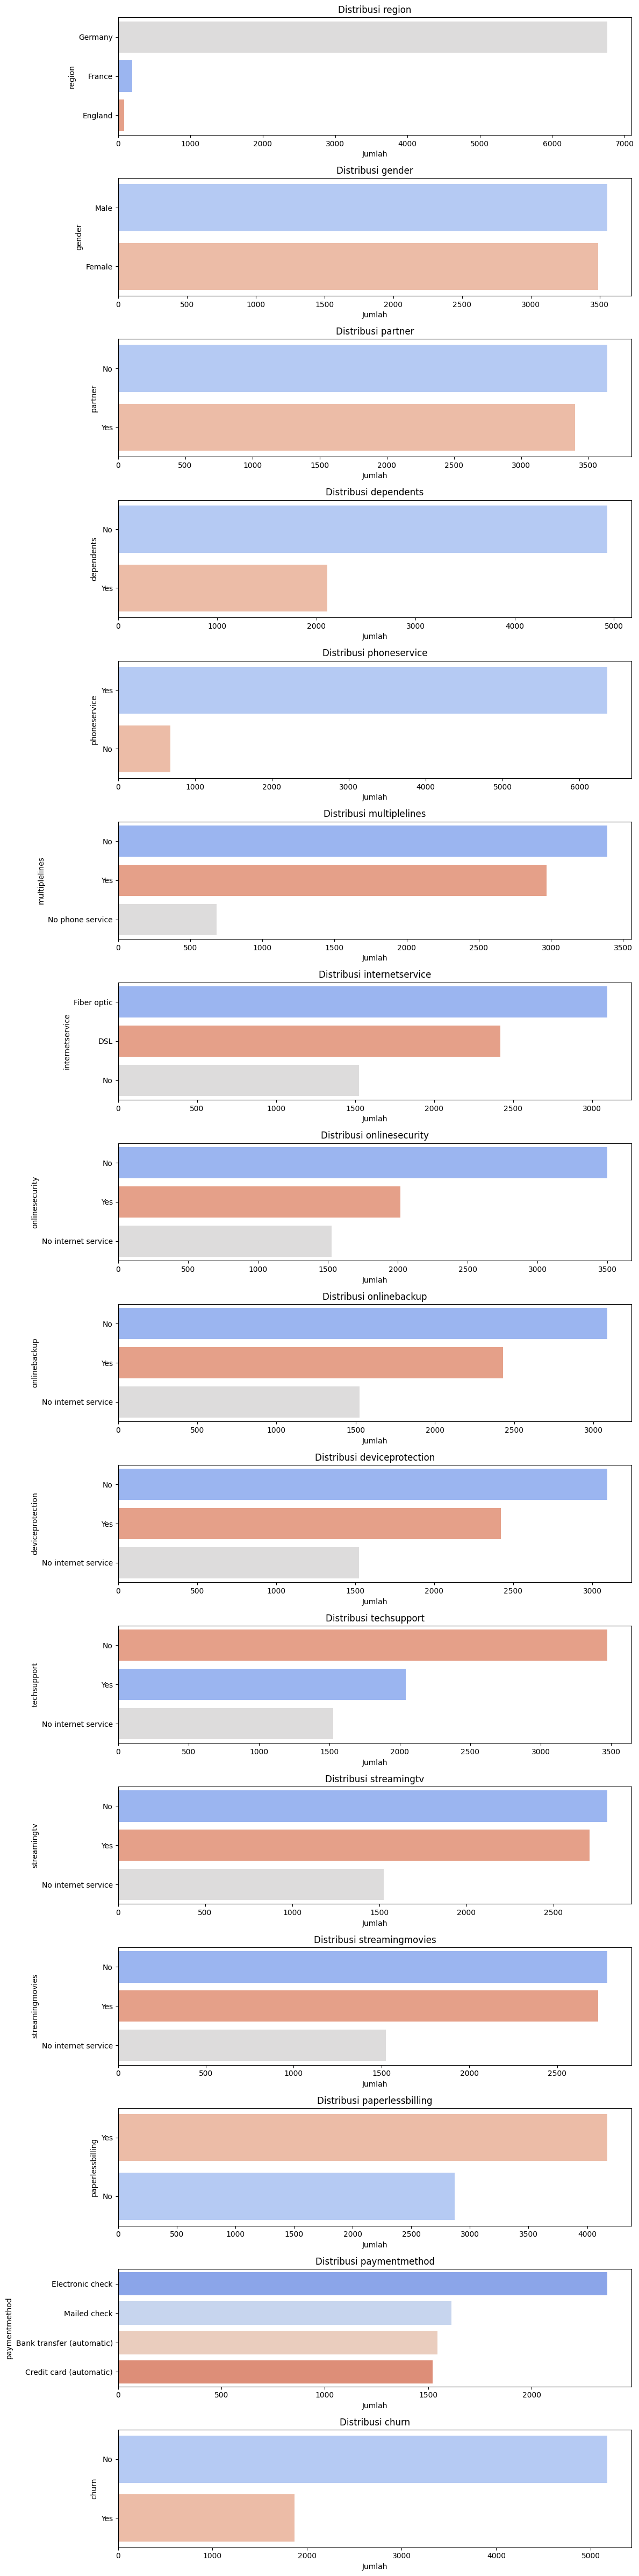

In [ ]:
# Menampilkan distribusi fitur kategorikal (kecuali customerid dan totalcharges)
categorical_features = data.select_dtypes(exclude=['number']).drop(columns=["customerid", "totalcharges"], errors='ignore')

plt.figure(figsize=(12, len(categorical_features.columns) * 3))
for i, col in enumerate(categorical_features.columns, 1):
    plt.subplot(len(categorical_features.columns), 1, i)
    sns.countplot(y=data[col], hue=data[col], legend=False, palette="coolwarm", order=data[col].value_counts().index)
    plt.title(f"Distribusi {col}")
    plt.xlabel("Jumlah")
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# jumlah pelanggan yang Churn dengan kriteria:
 - termasuk Senior Citizen
 - Monthly Charges > 75
 - Tenure > 20


In [ ]:
# Filter pelanggan yang memenuhi kriteria
filtered_data = data[(data['seniorcitizen'] == 1) &
                     (data['monthlycharges'] > 75) &
                     (data['tenure'] >20) ]


# Menampilkan jumlah pelanggan yang memenuhi kriteria
jumlah_churn = filtered_data.shape[0]
print(f"Jumlah pelanggan yang churn dengan kriteria di atas: {jumlah_churn}")
filtered_data.head(10)

Jumlah pelanggan yang churn dengan kriteria di atas: 514


,customerid,region,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3818,3956-CJUST,Germany,Female,1,No,No,23,Yes,No,Fiber optic,...,No,No,No,No,No,Yes,Bank transfer (automatic),75.40,1643.55,No
3886,7534-BFESC,Germany,Male,1,No,No,24,Yes,Yes,Fiber optic,...,No,No,No,No,No,Yes,Electronic check,76.10,1712.7,Yes
3957,2956-GGUCQ,Germany,Male,1,Yes,No,24,Yes,Yes,Fiber optic,...,No,No,No,No,No,Yes,Electronic check,78.85,1772.25,Yes
4018,4824-GUCBY,Germany,Female,1,No,No,22,Yes,No,Fiber optic,...,Yes,No,No,No,No,No,Electronic check,81.70,1820.9,No
4029,2070-XYMFH,Germany,Female,1,No,No,23,Yes,Yes,Fiber optic,...,No,Yes,No,No,No,Yes,Mailed check,79.35,1835.3,No
4051,7658-UYUQS,Germany,Male,1,Yes,No,21,Yes,No,Fiber optic,...,No,Yes,No,Yes,No,No,Bank transfer (automatic),86.55,1857.25,No
4053,0537-QYZZN,Germany,Male,1,Yes,Yes,24,Yes,Yes,Fiber optic,...,No,No,No,No,No,Yes,Electronic check,79.85,1857.75,No
4092,1989-PRJHP,Germany,Male,1,Yes,No,27,Yes,Yes,Fiber optic,...,No,No,No,No,No,Yes,Electronic check,75.50,1893.95,Yes
4105,6284-AHOOQ,Germany,Male,1,No,No,22,Yes,Yes,Fiber optic,...,No,No,Yes,Yes,No,Yes,Bank transfer (automatic),90.50,1910.6,Yes
4121,0257-ZESQC,Germany,Female,1,Yes,No,27,Yes,No,Fiber optic,...,No,No,No,No,No,Yes,Bank transfer (automatic),75.20,1929.35,Yes


# Jumlah pelanggan yang CHURN dengan kriteria:
- Paymentmethod = Mailed check
- berlangganan layanan streaming
- menggunakan internet service fiber optik

In [ ]:
# Filter data sesuai kriteria
filtered_churn = data[
    (data["paymentmethod"] == "Mailed check") &
    (data["streamingmovies"] == "Yes") &
    (data["internetservice"] == "Fiber optic") &
    (data["churn"] == 1)
]

# Hitung jumlah customer yang memenuhi kriteria
jumlah_churn = filtered_churn.shape[0]

print(f"Jumlah customer churn dengan kriteria tersebut: {jumlah_churn}")
filtered_churn.head(10)

Jumlah customer churn dengan kriteria tersebut: 41


,customerid,region,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
678,5275-SQEIZ,Germany,Male,0,No,No,1,Yes,No,Fiber optic,...,No,No,No,No,Yes,Yes,Mailed check,80.85,80.85,1
703,8937-RDTHP,England,Male,0,No,No,1,Yes,No,Fiber optic,...,No,No,No,No,Yes,Yes,Mailed check,84.60,84.6,1
716,9124-LHCJQ,Germany,Female,0,No,No,1,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Yes,Mailed check,85.45,85.45,1
723,3049-NDXFL,Germany,Female,0,No,No,1,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,No,Mailed check,85.80,85.8,1
737,3801-HMYNL,Germany,Male,0,Yes,Yes,1,Yes,No,Fiber optic,...,No,No,No,Yes,Yes,No,Mailed check,89.15,89.15,1
793,6857-VWJDT,Germany,Female,0,No,No,1,Yes,Yes,Fiber optic,...,No,No,No,Yes,Yes,No,Mailed check,95.65,95.65,1
1103,6275-YDUVO,Germany,Female,0,No,No,2,Yes,No,Fiber optic,...,No,Yes,No,No,Yes,Yes,Mailed check,86.20,178.7,1
1890,5842-POCOP,Germany,Female,0,Yes,No,5,Yes,No,Fiber optic,...,No,Yes,No,No,Yes,Yes,Mailed check,88.90,454.15,1
1908,4236-XPXAV,Germany,Female,0,Yes,Yes,5,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Yes,Yes,Mailed check,99.15,465.05,1
1970,5380-AFSSK,Germany,Female,0,No,No,5,Yes,Yes,Fiber optic,...,No,No,No,Yes,Yes,Yes,Mailed check,93.90,486.85,1


# Jumlah pelanggan yang CHURN dengan kriteria:
- Paymentmethod = Bank transfer (automatic)
- tenure selama kurang dari 12 bulan
- menggunakan internet service fiber optik

In [ ]:
churn_customers = data[
    (data["internetservice"] == "Fiber optic") &
    (data["paymentmethod"] == "Bank transfer (automatic)") &
    (data["tenure"] <= 12) &
    (data["churn"] == 0)
]

print(f"Jumlah pelanggan yang churn berdasarkan 3 kriteria utama: {len(churn_customers)}")
churn_customers.head(20)


Jumlah pelanggan yang churn berdasarkan 3 kriteria utama: 87


,customerid,region,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
492,5186-SAMNZ,Germany,Male,1,No,No,1,Yes,No,Fiber optic,...,No,No,No,No,No,Yes,Bank transfer (automatic),69.50,69.5,0
505,4501-EQDRN,Germany,Female,0,No,No,1,Yes,No,Fiber optic,...,No,No,No,No,No,No,Bank transfer (automatic),69.70,69.7,0
506,1084-UQCHV,Germany,Male,0,No,Yes,1,Yes,No,Fiber optic,...,No,No,No,No,No,No,Bank transfer (automatic),69.75,69.75,0
573,9747-DDZOS,Germany,Female,0,No,No,1,Yes,No,Fiber optic,...,No,Yes,No,No,No,No,Bank transfer (automatic),73.50,73.5,0
596,3746-EUBYR,Germany,Male,0,Yes,No,1,Yes,Yes,Fiber optic,...,No,No,No,No,No,Yes,Bank transfer (automatic),74.60,74.6,0
607,5564-NEMQO,Germany,Female,1,No,No,1,Yes,No,Fiber optic,...,No,Yes,No,No,No,Yes,Bank transfer (automatic),75.30,75.3,0
653,9507-EXLTT,Germany,Female,0,Yes,No,1,Yes,No,Fiber optic,...,No,No,No,Yes,No,Yes,Bank transfer (automatic),79.35,79.35,0
869,2260-USTRB,Germany,Female,1,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,No,Yes,Bank transfer (automatic),70.20,115.95,0
964,6166-ILMNY,Germany,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,No,No,Bank transfer (automatic),69.75,144.55,0
971,2983-ZANRP,Germany,Female,0,Yes,Yes,2,Yes,No,Fiber optic,...,Yes,No,No,No,No,Yes,Bank transfer (automatic),73.55,145.4,0


# Analisis RFM (Recency, Frequency, Monetary)

In [ ]:
# Ubah kolom 'totalcharges' menjadi numerik
data['totalcharges'] = pd.to_numeric(data['totalcharges'], errors='coerce')

# Hilangkan baris dengan nilai NaN pada 'totalcharges'
data = data.dropna(subset=['totalcharges'])

# Buat skor RFM
rfm_data = data.groupby("customerid").agg(
    Recency=("tenure", "max"),      # Lama berlangganan (semakin tinggi, semakin lama)
    Frequency=("customerid", "count"),  # Jumlah transaksi (hanya 1 per pelanggan dalam dataset ini)
    Monetary=("totalcharges", "sum")  # Total uang yang dibayarkan
).reset_index()

# Karena semua Frequency = 1, kita beri skor tetap
rfm_data["F_Score"] = 1

# Normalisasi Recency dan Monetary menggunakan kuantil
rfm_data["R_Score"] = pd.qcut(rfm_data["Recency"], 4, labels=[4, 3, 2, 1], duplicates="drop")
rfm_data["M_Score"] = pd.qcut(rfm_data["Monetary"], 4, labels=[1, 2, 3, 4], duplicates="drop")

# Gabungkan skor menjadi satu nilai RFM
rfm_data["RFM_Score"] = (
    rfm_data["R_Score"].astype(str) +
    rfm_data["F_Score"].astype(str) +
    rfm_data["M_Score"].astype(str)
)

# Fungsi untuk segmentasi pelanggan
def segment_customer(row):
    score = row["RFM_Score"]
    if score in ["444", "443", "434", "433"]:
        return "Best Customers"
    elif score in ["344", "334", "433", "432"]:
        return "Loyal Customers"
    elif score in ["144", "134", "124"]:
        return "Potential Loyalists"
    elif score in ["441", "431", "421"]:
        return "Recent Customers"
    elif score in ["114", "113", "112"]:
        return "Churn Risk"
    else:
        return "Others"

# Terapkan segmentasi ke pelanggan
rfm_data["Segment"] = rfm_data.apply(segment_customer, axis=1)

# Tampilkan hasil
print(rfm_data.head())
print(rfm_data["Segment"].value_counts())


   customerid  Recency  Frequency  Monetary  F_Score R_Score M_Score  \
0  0002-ORFBO        9          1    593.30        1       4       2   
1  0003-MKNFE        9          1    542.40        1       4       2   
2  0004-TLHLJ        4          1    280.85        1       4       1   
3  0011-IGKFF       13          1   1237.85        1       3       2   
4  0013-EXCHZ        3          1    267.40        1       4       1   

  RFM_Score Segment  
0       412  Others  
1       412  Others  
2       411  Others  
3       312  Others  
4       411  Others  
Segment
Others        5275
Churn Risk    1757
Name: count, dtype: int64


# Visualisasi RFM

## 1. Distribusi Skor RFM

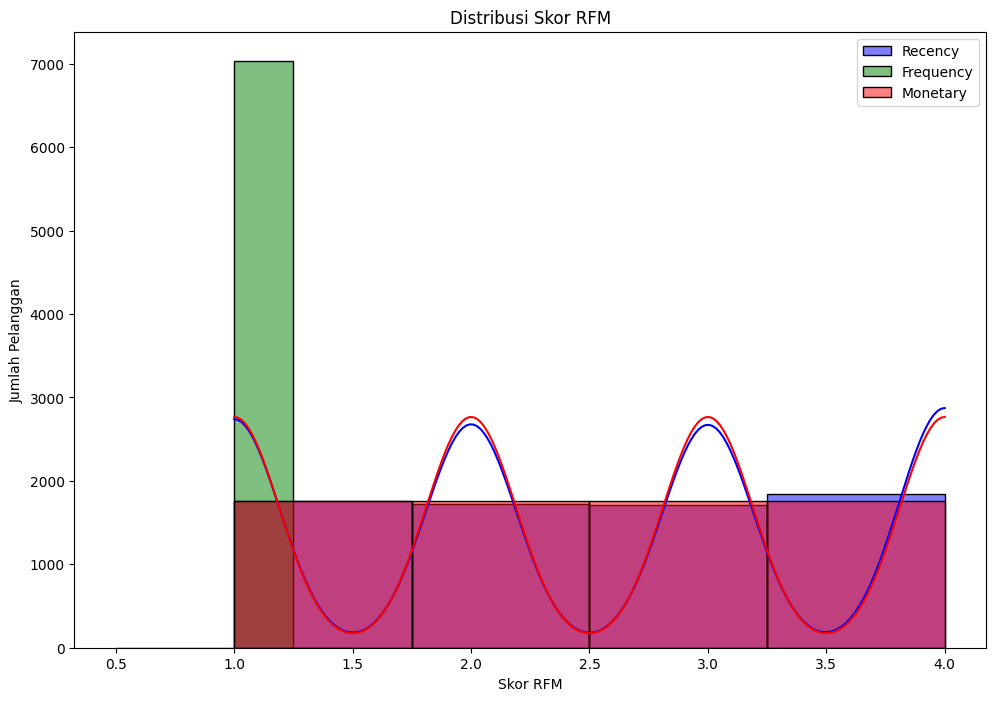

In [ ]:
# Ukuran plot lebih besar agar mudah dibaca
plt.figure(figsize=(40, 8))

# 1. Distribusi Skor RFM
plt.subplot(1, 3, 1)
sns.histplot(rfm_data["R_Score"].astype(int), bins=4, kde=True, color='blue', label="Recency")
sns.histplot(rfm_data["F_Score"].astype(int), bins=4, kde=True, color='green', label="Frequency")
sns.histplot(rfm_data["M_Score"].astype(int), bins=4, kde=True, color='red', label="Monetary")
plt.xlabel("Skor RFM")
plt.ylabel("Jumlah Pelanggan")
plt.title("Distribusi Skor RFM")
plt.legend()

## 2. Pie Chart Segmen Pelanggan

Text(0.5, 1.0, 'Distribusi Segmen Pelanggan')

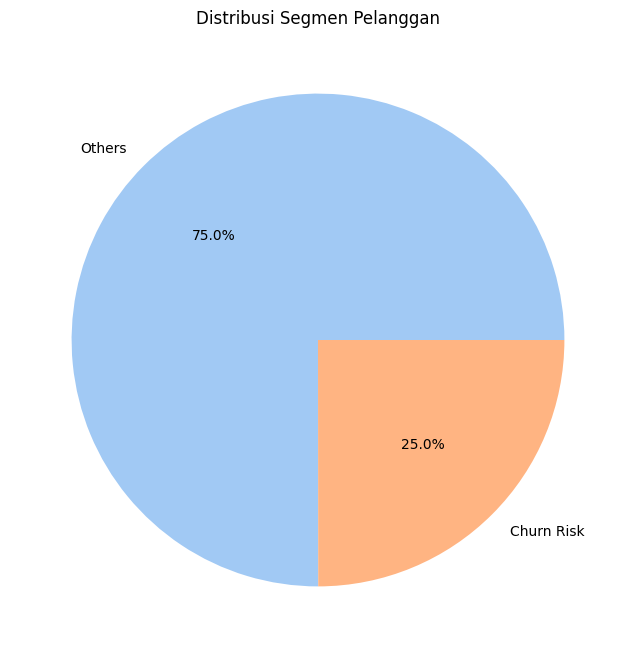

In [ ]:
# 2. Pie Chart Segmen Pelanggan
plt.figure(figsize=(40, 8))
plt.subplot(1, 3, 2)
rfm_data["Segment"].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.ylabel("")
plt.title("Distribusi Segmen Pelanggan")


## 3. Scatter Plot (Monetary vs. Frequency)

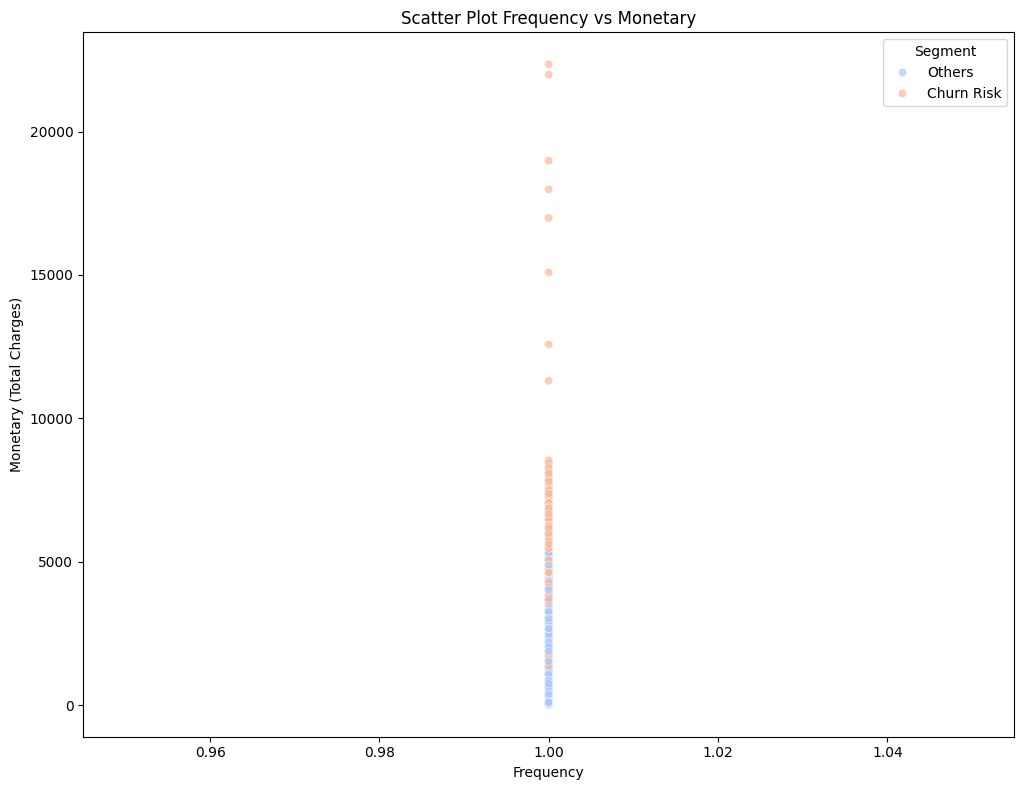

In [ ]:
# 3. Scatter Plot (Monetary vs. Frequency)
plt.figure(figsize=(30, 8))
plt.subplot(1, 3, 3)
sns.scatterplot(x=rfm_data["Frequency"], y=rfm_data["Monetary"], hue=rfm_data["Segment"], palette="coolwarm", alpha=0.7)
plt.xlabel("Frequency")
plt.ylabel("Monetary (Total Charges)")
plt.title("Scatter Plot Frequency vs Monetary")

plt.tight_layout()
plt.show()


## 4. Heatmap RFM Score

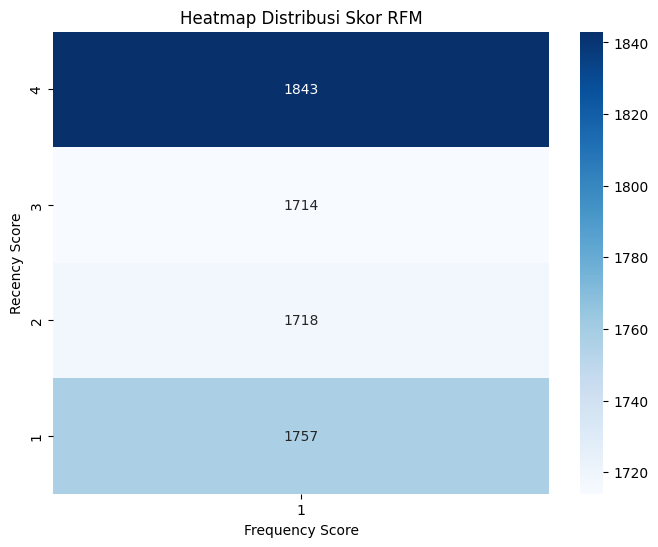

In [ ]:
# Membuat heatmap RFM Score
plt.figure(figsize=(8, 6))  # Atur ukuran hanya sekali

# Buat pivot table dengan observed=False untuk menghindari warning
rfm_pivot = rfm_data.pivot_table(index="R_Score", columns="F_Score", values="M_Score", aggfunc="count", observed=False)

# Plot heatmap
sns.heatmap(rfm_pivot, annot=True, cmap="Blues", fmt=".0f")

# Tambahkan judul dan label
plt.title("Heatmap Distribusi Skor RFM")
plt.xlabel("Frequency Score")
plt.ylabel("Recency Score")

# Tampilkan plot
plt.show()

In [ ]:
# === 1. Import Library yang Dibutuhkan ===
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# === 2. Load Dataset ===
# Ganti ini dengan dataset kamu
# Contoh data dummy (hapus ini kalau pakai data asli)
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,
                           n_redundant=2, n_classes=2, weights=[0.7, 0.3], random_state=42)

# === 3. Split Data ke Train dan Test ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === 4. Terapkan SMOTE ===
smote = SMOTE(random_state=42)
train_smote_X, train_smote_y = smote.fit_resample(X_train, y_train)
test_X = X_test.copy()

# === 5. Konversi ke DataFrame jika masih array (penting!)
train_smote_X = pd.DataFrame(train_smote_X)
test_X = pd.DataFrame(test_X)

# === 6. Scaling Fitur Numerik ===
num_cols = train_smote_X.select_dtypes(include=["int64", "float64", "float32", "int32"]).columns

# Inisialisasi scaler
ss = StandardScaler()

# Ikuti struktur kode asli
train_smote_X_2 = train_smote_X
test_X_2 = test_X

# Scaling (sama seperti kode awal)
train_smote_X_2[num_cols] = ss.fit_transform(train_smote_X_2[num_cols])
test_X_2[num_cols] = ss.transform(test_X_2[num_cols])

# === 7. Cek hasil akhir ===
print("train_smote_X_2 shape:", train_smote_X_2.shape)
print("test_X_2 shape:", test_X_2.shape)


train_smote_X_2 shape: (1116, 10)
test_X_2 shape: (200, 10)


🔍 Training SVM dengan GridSearchCV...

📌 Best Parameters Found:
------------------------------
{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

✅ Accuracy Score:
------------------------------
0.8400

📋 Classification Report:
------------------------------
              precision    recall  f1-score   support

           0       0.82      0.99      0.90       139
           1       0.94      0.51      0.66        61

    accuracy                           0.84       200
   macro avg       0.88      0.75      0.78       200
weighted avg       0.86      0.84      0.82       200


🧾 Confusion Matrix:
------------------------------
[[137   2]
 [ 30  31]]


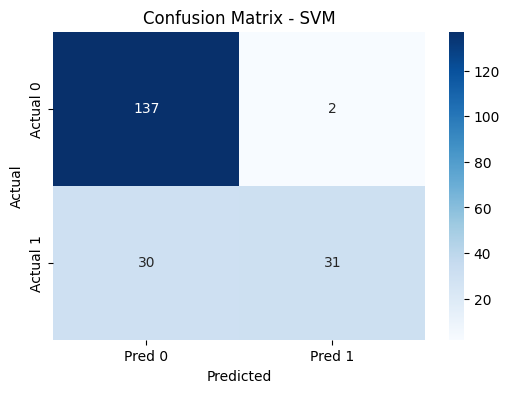

In [ ]:
# === 1. Import Library SVM dan GridSearch ===
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

# === 2. Inisialisasi Model SVM ===
svm = SVC()

# === 3. Buat Parameter Grid untuk Hyperparameter Tuning ===
param_grid = {
    "C": [0.1, 1],
    "gamma": [0.1, 1],
    "kernel": ["linear", "rbf"]
}

# === 4. GridSearch untuk Mencari Parameter Terbaik ===
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# === 5. Fit Model ke Data Training ===
print("🔍 Training SVM dengan GridSearchCV...")
grid_search.fit(train_smote_X_2, train_smote_y)

# === 6. Prediksi pada Data Uji ===
y_pred = grid_search.predict(test_X_2)

# === 7. Evaluasi Model ===
print("\n📌 Best Parameters Found:")
print("-" * 30)
print(grid_search.best_params_)

print("\n✅ Accuracy Score:")
print("-" * 30)
print(f"{accuracy_score(y_test, y_pred):.4f}")

print("\n📋 Classification Report:")
print("-" * 30)
print(classification_report(y_test, y_pred))

print("\n🧾 Confusion Matrix:")
print("-" * 30)
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Optional: Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


🔄 Melatih model SVM dengan GridSearchCV...

📌 Best Hyperparameters (CV_svm)
----------------------------------------
{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

✅ Accuracy Score (CV_svm)
----------------------------------------
Akurasi: 0.8400

📋 Classification Report (CV_svm)
----------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.99      0.90       139
           1       0.94      0.51      0.66        61

    accuracy                           0.84       200
   macro avg       0.88      0.75      0.78       200
weighted avg       0.86      0.84      0.82       200


📊 Visualisasi Confusion Matrix:


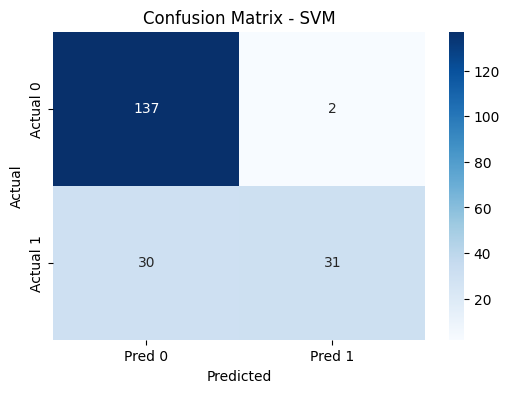

In [ ]:
# === Import Library Tambahan untuk Visualisasi ===
import seaborn as sns
import matplotlib.pyplot as plt

# === Inisialisasi GridSearchCV untuk SVM ===
CV_svm = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# === Training Model dengan Data SMOTE + Scaling ===
print("🔄 Melatih model SVM dengan GridSearchCV...")
CV_svm.fit(train_smote_X_2, train_smote_y)

# === Prediksi pada Data Uji ===
y_pred_cv = CV_svm.predict(test_X_2)

# === Evaluasi Hasil Model ===
print("\n📌 Best Hyperparameters (CV_svm)")
print("-" * 40)
print(CV_svm.best_params_)

print("\n✅ Accuracy Score (CV_svm)")
print("-" * 40)
print(f"Akurasi: {accuracy_score(y_test, y_pred_cv):.4f}")

print("\n📋 Classification Report (CV_svm)")
print("-" * 40)
print(classification_report(y_test, y_pred_cv))

# === Visualisasi Confusion Matrix ===
print("\n📊 Visualisasi Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_cv)

# Plot Confusion Matrix dengan Seaborn Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
# Menampilkan parameter terbaik dari GridSearchCV
print("\n📌 Best Hyperparameters (cv_svm):")
print("-" * 40)
print(f"Best Parameters: {CV_svm.best_params_}")


📌 Best Hyperparameters (cv_svm):
----------------------------------------
Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
# Setelah melakukan GridSearchCV dan pelatihan model, kita bisa melakukan prediksi dengan model yang sudah terlatih
pred = CV_svm.predict(test_X_2)

# Menampilkan prediksi pertama untuk memastikan semuanya berjalan dengan baik
print("\n🔮 Prediksi pertama dari test_X_2:")
print(pred[:10])  # Menampilkan 10 prediksi pertama



🔮 Prediksi pertama dari test_X_2:
[0 0 0 0 0 0 1 0 0 0]


In [ ]:
# Pastikan prediksi sudah dilakukan sebelumnya menggunakan cv_svm
pred = CV_svm.predict(test_X_2)

# Menggunakan accuracy_score untuk mengevaluasi model pada data uji
from sklearn.metrics import accuracy_score

# Menampilkan akurasi model pada data uji
print("Accuracy for SVM on CV data: ", accuracy_score(y_test, pred))

Accuracy for SVM on CV data:  0.84


In [ ]:
# Pastikan prediksi sudah dilakukan sebelumnya menggunakan cv_svm
pred = CV_svm.predict(test_X_2)

# Mengimpor confusion_matrix dari sklearn.metrics
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix antara target asli (y_test) dan prediksi
CF = confusion_matrix(y_test, pred)

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(CF)

Confusion Matrix:
[[137   2]
 [ 30  31]]


In [ ]:
# Pastikan prediksi sudah dilakukan sebelumnya menggunakan cv_svm
pred = CV_svm.predict(test_X_2)

# Mengimpor classification_report dari sklearn.metrics
from sklearn.metrics import classification_report

# Definisikan nama-nama kelas target (biasanya 'No' dan 'Yes' untuk klasifikasi biner)
target_names = ['No', 'Yes']

# Menampilkan classification report untuk evaluasi model
print(classification_report(y_test, pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.82      0.99      0.90       139
         Yes       0.94      0.51      0.66        61

    accuracy                           0.84       200
   macro avg       0.88      0.75      0.78       200
weighted avg       0.86      0.84      0.82       200



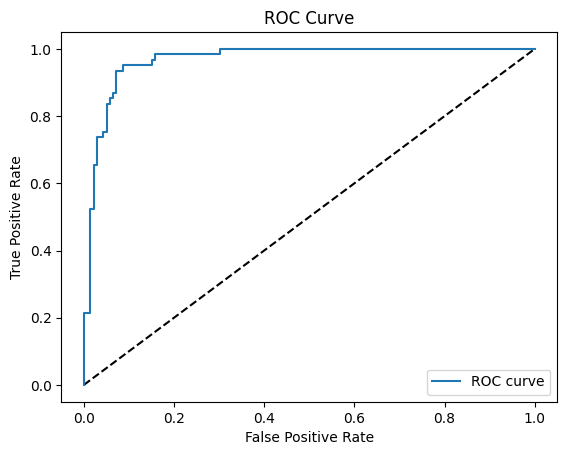

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Menggunakan SVC dengan probability=True
svm = SVC(probability=True)

# Melakukan GridSearchCV dengan parameter probability=True
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
CV_svm.fit(train_smote_X_2, train_smote_y)

# Mendapatkan probabilitas kelas positif (kolom kedua dari predict_proba)
pred_prob = CV_svm.predict_proba(test_X_2)[:, 1]  # Probabilitas untuk kelas 1 (Yes)

# Menghitung ROC curve: fpr, tpr, dan thresholds
fpr, tpr, thresholds = roc_curve(y_test, pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')  # Garis diagonal (random classifier)
plt.plot(fpr, tpr, label="ROC curve")  # Plot ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

# Menggunakan decision_function untuk mendapatkan skor keputusan
decision_scores = CV_svm.decision_function(test_X_2)

# Menghitung AUC ROC
roc_auc = roc_auc_score(y_test, decision_scores)

# Menampilkan nilai AUC
print(f"AUC ROC Score: {roc_auc:.4f}")


AUC ROC Score: 0.9673


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Inisialisasi model RandomForest
rfc = RandomForestClassifier()

# Parameter grid untuk pencarian hyperparameter
param_grid = {
    'n_estimators': [200, 500, 1000],
    'max_features': ['auto', 'log2'],
    'criterion': ['entropy', 'gini'],
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Misalnya kamu sudah memiliki data X_train dan y_train
# grid_search.fit(X_train, y_train)

# Setelah fitting, kamu dapat mengambil parameter terbaik
# print("Best parameters:", grid_search.best_params_)

# Menggunakan model terbaik dari GridSearchCV untuk prediksi
# y_pred = grid_search.predict(X_test)

# Menghitung akurasi
# print("Accuracy: ", accuracy_score(y_test, y_pred))


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Contoh pembuatan data (ganti dengan data Anda)
X, y = make_classification(n_samples=100, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)

# Definisi param_grid (sama seperti yang Anda berikan)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# Inisialisasi GridSearchCV
cv_rf = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3)

# Melatih GridSearchCV (ini akan menghasilkan output)
cv_rf.fit(X_train, y_train)

# Output yang mungkin Anda lihat
print("Best Parameters:", cv_rf.best_params_)
print("Best Score:", cv_rf.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9131054131054132


In [ ]:
# Menampilkan parameter terbaik dari GridSearchCV setelah fit
print("\n📌 Best Parameters Found (GridSearchCV):")
print("=" * 40)
print(f"Best Parameters: {cv_rf.best_params_}")
print("=" * 40)



📌 Best Parameters Found (GridSearchCV):
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# Evaluasi model menggunakan data uji
pred = cv_rf.predict(X_test)  # Gunakan objek cv_rf untuk prediksi

# Menghitung akurasi
accuracy = accuracy_score(y_test, pred)

# Menampilkan hasil akurasi
print("Accuracy for Random Forest on CV data: ", accuracy)


Accuracy for Random Forest on CV data:  1.0


In [ ]:
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
CF = confusion_matrix(y_test, pred)

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(CF)


Confusion Matrix:
[[ 9  0]
 [ 0 11]]


In [ ]:
from sklearn.metrics import classification_report

# Tentukan nama target sesuai dengan label yang ada di data
target_names = ['No', 'Yes']

# Menampilkan classification report
print(classification_report(y_test, pred, target_names=target_names))


              precision    recall  f1-score   support

          No       1.00      1.00      1.00         9
         Yes       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



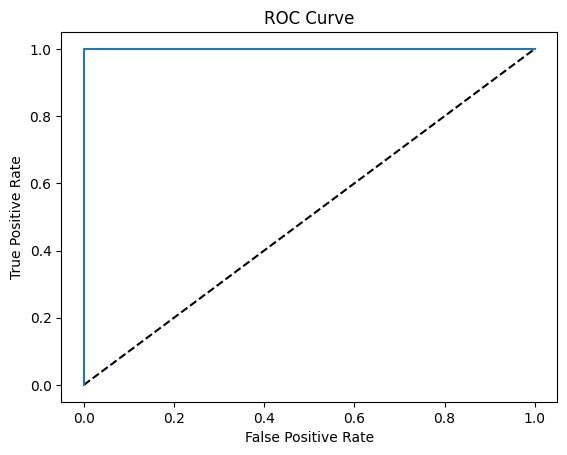

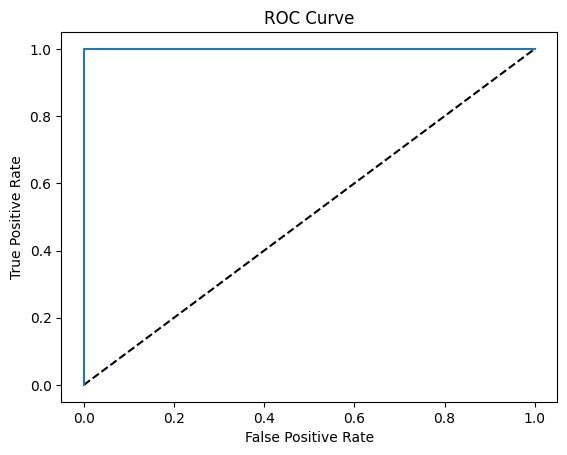

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Menggunakan predict_proba untuk mendapatkan probabilitas untuk kelas positif (1)
# pastikan GridSearchCV sudah dilatih dan prediksi probabilitas tersedia
fpr, tpr, thresholds = roc_curve(y_test, cv_rf.predict_proba(X_test)[:, 1])

# Plot ROC curvefrom sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Menggunakan predict_proba untuk mendapatkan probabilitas untuk kelas positif (1)
# pastikan GridSearchCV sudah dilatih dan prediksi probabilitas tersedia
fpr, tpr, thresholds = roc_curve(y_test, cv_rf.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')  # Garis diagonal (chance line)
plt.plot(fpr, tpr)  # ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

plt.plot([0, 1], [0, 1], 'k--')  # Garis diagonal (chance line)
plt.plot(fpr, tpr)  # ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score

# Gunakan predict_proba untuk mendapatkan probabilitas untuk kelas positif (1)
# Pastikan Anda telah menggunakan model terbaik dari GridSearchCV (misalnya cv_rf)
roc_auc = roc_auc_score(y_test, cv_rf.predict_proba(X_test)[:, 1])

print(f"AUC: {roc_auc:.4f}")


AUC: 1.0000


In [ ]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi StandardScaler
ss = StandardScaler()

# Pastikan 'num_cols' adalah daftar nama kolom numerik
# Contoh: num_cols = ['col1', 'col2', 'col3'] jika Anda tahu kolom mana yang numerik.

# Scaling data latih menggunakan fit_transform
train_smote_X[num_cols] = ss.fit_transform(train_smote_X[num_cols])

# Scaling data uji menggunakan transform (dengan scaler yang sama)
test_X[num_cols] = ss.transform(test_X[num_cols])

# Menampilkan hasil scaling secara lebih rapi
print("📊 Data Latih Setelah Scaling:")
print("=" * 40)
print(train_smote_X.head(), "\n")  # Tampilkan hanya 5 baris pertama untuk preview

print("📊 Data Uji Setelah Scaling:")
print("=" * 40)
print(test_X.head())  # Tampilkan hanya 5 baris pertama untuk preview


📊 Data Latih Setelah Scaling:
          0         1         2         3         4         5         6  \
0 -1.036409 -0.845282  1.197848 -0.549680  0.315354  0.342205 -0.263273   
1 -0.918514  1.217899 -1.367108 -2.134960  0.193804  1.424609 -0.609806   
2 -0.611866 -1.112688  0.181970 -0.015842  1.516555  1.119635  1.376547   
3 -2.024588 -1.366989 -0.076579 -1.290882 -0.146362  0.150220 -1.417660   
4  0.848502  0.540372  1.639689  0.104818  0.387605 -0.472885  0.321021   

          7         8         9  
0  0.664484 -0.373590  0.340230  
1  1.840336 -0.697807 -0.324353  
2 -1.720473 -0.398565  0.390456  
3  0.008426 -0.373452  0.606781  
4 -0.831113  0.101216  0.135658   

📊 Data Uji Setelah Scaling:
          0         1         2         3         4         5         6  \
0  0.363663  0.377817  1.151437 -0.388205  0.354925  0.823554  0.543197   
1  0.346573  0.373787 -0.404862 -0.655244  0.118983 -0.467673 -0.468487   
2 -3.042220 -2.287114  0.886140 -0.931661  0.646562 -1.34482

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# === 1. Membuat Data Dummy Sebagai Contoh ===
# Gantilah ini dengan data asli Anda jika sudah ada
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, random_state=42)

# === 2. Membagi Data Menjadi Data Latih dan Data Uji ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === 3. Terapkan SMOTE untuk Mengatasi Ketidakseimbangan Kelas ===
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# === 4. Inisialisasi Model KNN ===
knnc = KNeighborsClassifier()

# === 5. Parameter Grid untuk Pencarian Hyperparameter ===
param_grid = {
    'n_neighbors': [3, 5, 7],   # Jumlah tetangga terdekat
    'weights': ['uniform', 'distance'],   # Bobot untuk tetangga
    'metric': ['euclidean', 'manhattan']   # Jenis metrik yang digunakan
}

# === 6. Inisialisasi GridSearchCV ===
grid_search = GridSearchCV(estimator=knnc, param_grid=param_grid, cv=3, scoring='accuracy')

# === 7. Melakukan Pencarian Hyperparameter pada Data Latih yang Sudah di-SMOTE ===
grid_search.fit(X_train_smote, y_train_smote)

# === 8. Menampilkan Hasil Pencarian Hyperparameter Terbaik ===
print("Hasil GridSearchCV:")
print("Parameter Terbaik:", grid_search.best_params_)
print("Akurasi Terbaik (Cross-Validation):", grid_search.best_score_)

# === 9. Membuat Model KNN Terbaik Berdasarkan Hasil Grid Search ===
best_knnc = grid_search.best_estimator_

# === 10. Melakukan Prediksi pada Data Uji ===
y_pred = best_knnc.predict(X_test)

# === 11. Menghitung Akurasi Model Terbaik pada Data Uji ===
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi Model Terbaik pada Data Uji:", accuracy)

Hasil GridSearchCV:
Parameter Terbaik: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Akurasi Terbaik (Cross-Validation): 0.9493827160493827
Akurasi Model Terbaik pada Data Uji: 0.945


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Misalkan X_train, X_test, y_train, y_test sudah ada
# Pastikan data sudah dibagi menjadi train dan test
# Contoh data dummy jika tidak ada
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Terapkan SMOTE untuk menangani ketidakseimbangan kelas pada data latih
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Inisialisasi KNeighborsClassifier dan parameter grid
knnc = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Inisialisasi GridSearchCV
CV_knnc = GridSearchCV(estimator=knnc, param_grid=param_grid, cv=2)

# Scaling data latih
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)  # fit_transform pada data latih

# Fit model menggunakan GridSearchCV
CV_knnc.fit(X_train_smote_scaled, y_train_smote)

# Data uji harus diskalakan juga menggunakan scaler yang sama
X_test_scaled = scaler.transform(X_test)  # transform pada data uji

# Prediksi menggunakan model yang sudah dilatih
pred = CV_knnc.predict(X_test_scaled)

# Menghitung akurasi
accuracy = accuracy_score(y_test, pred)

# Menampilkan hasil
print(f"Best Parameters from GridSearchCV: {CV_knnc.best_params_}")
print(f"Accuracy for KNN on Test Data: {accuracy:.4f}")


Best Parameters from GridSearchCV: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Accuracy for KNN on Test Data: 0.9350


In [ ]:
# Pastikan pred sudah terdefinisi sebagai hasil prediksi
pred = CV_knnc.predict(X_test_scaled)

# Menghitung dan menampilkan akurasi
print("Accuracy for KNN on CV data: ", accuracy_score(y_test, pred))


Accuracy for KNN on CV data:  0.935


In [ ]:
from sklearn.metrics import classification_report

# Pastikan pred sudah didefinisikan dengan benar sebelumnya
# pred = CV_knnc.predict(X_test_scaled)  # Pastikan ini sudah dilakukan sebelumnya

# Label target yang digunakan dalam classification_report
target_names = ['No', 'Yes']

# Menampilkan classification report dengan hasil prediksi dan label asli
print(classification_report(y_test, pred, target_names=target_names))


              precision    recall  f1-score   support

          No       0.94      0.93      0.94       104
         Yes       0.93      0.94      0.93        96

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200

